### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
print("Import Successful !!!")

Import Successful !!!


In [2]:
# Load the csv file.

df = pd.read_csv(r"messy_ice_detention.csv", encoding = "latin1") # Use latin1 to avoid UnicodeDecodeError from non-UTF-8 characters

In [3]:
# Done to scroll through the entire DataFrame for easy visualization of the original data
pd.options.display.max_rows = None 

In [4]:
df

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,45673
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,45491
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,45554
3,ALEXA$NDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,45533
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaN
5,ALL%EN PARISH PUBLIC SAFETY +COMPLEX,OBERLIN,LA,101.311377,30.251497,33.766467,10.664671,45638
6,ATLANTA US PEN,ATLANTA,,17.341317,3.610778,3.053892,2.724551,NaN
7,B^AKER COUNTY SHERIFF DEPT.,MACCLENNY,FL,26.221557,38.640719,88.652695,88.730539,45589
8,BERLIN FED. CORR. INST.,BERLIN,NH,1.748503,0.089800,0.970060,0.712575,NaN
9,BLUEBONNET DETENTION FACILITY,ANSON,TX,311.305389,164.550898,241.616767,104.514970,45638


In [5]:
print(f"Rows: {df.shape[0]}, Columns:{df.shape[1]}")

Rows: 134, Columns:8


# 1. Cleaning CSV

### Droping Duplicate rows if any

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
print(f"Rows: {df.shape[0]}, Columns:{df.shape[1]}")

Rows: 134, Columns:8


### Checking the data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      134 non-null    object 
 1   City                      134 non-null    object 
 2   State                     134 non-null    object 
 3   Level A                   134 non-null    float64
 4   Level B                   134 non-null    float64
 5   Level C                   134 non-null    float64
 6   Level D                   134 non-null    float64
 7   Last Inspection End Date  117 non-null    object 
dtypes: float64(4), object(4)
memory usage: 8.5+ KB


### Converting Last Inspected End Date to correct data type(datetime)

In [9]:
df["Last Inspection End Date"] = pd.to_numeric(df["Last Inspection End Date"], errors = "coerce")

In [10]:
# Set origin and unit to correctly convert Excel-style date numbers into real dates
df["Last Inspection End Date"] = pd.to_datetime(df["Last Inspection End Date"], origin = '1899-12-30', unit ='D', errors = "coerce") 


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      134 non-null    object        
 1   City                      134 non-null    object        
 2   State                     134 non-null    object        
 3   Level A                   134 non-null    float64       
 4   Level B                   134 non-null    float64       
 5   Level C                   134 non-null    float64       
 6   Level D                   134 non-null    float64       
 7   Last Inspection End Date  116 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 8.5+ KB


In [12]:
df

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,2024-07-18
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,2024-09-19
3,ALEXA$NDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,2024-08-29
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaT
5,ALL%EN PARISH PUBLIC SAFETY +COMPLEX,OBERLIN,LA,101.311377,30.251497,33.766467,10.664671,2024-12-12
6,ATLANTA US PEN,ATLANTA,,17.341317,3.610778,3.053892,2.724551,NaT
7,B^AKER COUNTY SHERIFF DEPT.,MACCLENNY,FL,26.221557,38.640719,88.652695,88.730539,2024-10-24
8,BERLIN FED. CORR. INST.,BERLIN,NH,1.748503,0.089800,0.970060,0.712575,NaT
9,BLUEBONNET DETENTION FACILITY,ANSON,TX,311.305389,164.550898,241.616767,104.514970,2024-12-12


### Handling Special characters

Creating a function:
- to check whether every "object" column consists of special charcters or not and handle them.
- to Standardize all the Texts to Proper case

In [13]:
def remove_special_chars(df):
    df_copy = df.copy()

    for col in df_copy:
        if df_copy[col].dtype == "object":           
            df_copy[col] = df_copy[col].astype(str).str.replace(r"[^A-Za-z0-9 ]","", regex =True).str.replace(r"\s+", " ", regex = True).str.strip().str.title()
    return df_copy

 # Use regular expressions to remove special characters, normalize extra spaces, and standardize text formatting in string columns

In [14]:
df_new = remove_special_chars(df)

In [15]:
df_new

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,Adams County Det Center,Natchez,Ms,1876.461078,266.431138,6.724551,4.257485,2025-01-16
1,Adelanto Ice Processing Center,Adelanto,Ca,6.401198,4.323353,22.604790,32.634731,2024-07-18
2,Alamance County Detention Facility,Graham,Nc,4.329341,3.461078,6.083832,6.185629,2024-09-19
3,Alexandria Staging Facility,Alexandria,La,137.520958,47.413174,76.005988,52.485030,2024-08-29
4,Allegany County Jail,Belmont,Ny,1.221557,0.018000,0.000000,0.000000,NaT
5,Allen Parish Public Safety Complex,Oberlin,La,101.311377,30.251497,33.766467,10.664671,2024-12-12
6,Atlantauspen,Atlanta,,17.341317,3.610778,3.053892,2.724551,NaT
7,Baker County Sheriff Dept,Macclenny,Fl,26.221557,38.640719,88.652695,88.730539,2024-10-24
8,Berlin Fed Corr Inst,Berlin,Nh,1.748503,0.089800,0.970060,0.712575,NaT
9,Bluebonnet Detention Facility,Anson,Tx,311.305389,164.550898,241.616767,104.514970,2024-12-12


### Handling missing values

Creating another function to check which rows have empty cells

In [16]:
def missing_values(df_new):
    df_copy1 = df_new.copy()
    str_cols = df_copy1.select_dtypes(include = "object")

    mask = (str_cols.isna() | str_cols.apply(lambda x: x.str.strip() == "")).any(axis=1)

    return df_copy1[mask]

In [17]:
df_new1 = missing_values(df_new)

In [18]:
df_new1

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
6,Atlantauspen,Atlanta,,17.341317,3.610778,3.053892,2.724551,NaT
51,Geauga County Jail,,Oh,24.676647,13.059880,7.580838,2.694611,2025-01-30
71,La Salle County Regional Detention Center,Encinal,,8.910180,0.706587,0.000000,0.071900,2025-02-07
116,,Elk River,Mn,4.592814,5.598802,9.281437,2.760479,2024-05-02
123,,Dover,Nh,0.000000,0.000000,49.161677,41.335329,2024-09-12


Filling the missing values for columns: Name, City and State

In [19]:
# Filling the Names of the respective detention centers according to the City and state

Jail_name = {"Elk River":"Sherburne County Jail","Dover": "Strafford County Jail or Corrections"}
df_new["Name"] = df_new["City"].map(Jail_name).fillna(df_new["Name"])

In [20]:
# Filling City name according to the detention center and the State

City_name = {"Oh": "Chardon"}
df_new["City"] = df_new["State"].map(City_name).fillna(df_new["City"])

In [21]:
#Filling State names according to the City 

State_name = {"Atlanta":"Ga","Encinal":"Tx"}
df_new["State"] = df_new["City"].map(State_name).fillna(df_new["State"])

In [22]:
# converting State name to Upper case for easy understandability

df_new["State"] = df_new["State"].str.upper()

In [23]:
df_new

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,Adams County Det Center,Natchez,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16
1,Adelanto Ice Processing Center,Adelanto,CA,6.401198,4.323353,22.604790,32.634731,2024-07-18
2,Alamance County Detention Facility,Graham,NC,4.329341,3.461078,6.083832,6.185629,2024-09-19
3,Alexandria Staging Facility,Alexandria,LA,137.520958,47.413174,76.005988,52.485030,2024-08-29
4,Allegany County Jail,Belmont,NY,1.221557,0.018000,0.000000,0.000000,NaT
5,Allen Parish Public Safety Complex,Oberlin,LA,101.311377,30.251497,33.766467,10.664671,2024-12-12
6,Atlantauspen,Atlanta,GA,17.341317,3.610778,3.053892,2.724551,NaT
7,Baker County Sheriff Dept,Macclenny,FL,26.221557,38.640719,88.652695,88.730539,2024-10-24
8,Berlin Fed Corr Inst,Berlin,NH,1.748503,0.089800,0.970060,0.712575,NaT
9,Bluebonnet Detention Facility,Anson,TX,311.305389,164.550898,241.616767,104.514970,2024-12-12


# 2. Analyze

### Total Population by each detention center

In [24]:
df_new["Total Avg Population"] = df_new[["Level A", "Level B", "Level C", "Level D"]].sum(axis = 1) # Used axis = 1 for row wise calculation 

In [25]:
# sorting values in descending order and getting the top 10 values

Top_10_Facilities = df_new.sort_values(by = "Total Avg Population", ascending = False).head(10)

In [26]:
Top_10_Facilities

,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date,Total Avg Population
0,Adams County Det Center,Natchez,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16,2153.874252
119,South Texas Ice Processing Center,Pearsall,TX,1299.083832,106.125749,188.724551,68.197605,2025-02-06,1662.131736
122,Stewart Detention Center,Lumpkin,GA,743.311377,194.928144,371.562874,328.041916,2024-08-01,1637.844311
132,Winn Correctional Center,Winnfield,LA,1013.023952,214.772455,187.005988,94.580838,2025-01-16,1509.383233
93,Otay Mesa Detention Center,San Diego,CA,800.826347,470.119760,45.479042,46.215569,2024-11-07,1362.640719
41,Eloy Federal Contract Facility,Eloy,AZ,1041.886228,45.538922,114.688623,125.610778,2024-10-31,1327.724551
83,Moshannon Valley Processing Center,Philipsburg,PA,205.245509,96.467066,542.275449,402.059880,2025-03-06,1246.047904
82,Montgomery Ice Processing Center,Conroe,TX,149.556886,561.425150,355.269461,160.976048,2024-12-05,1227.227545
18,Central Louisiana Ice Processing Center Clipc,Jena,LA,410.970060,221.209581,344.790419,207.161677,2025-01-09,1184.131736
31,Denver Contract Detention Facility,Aurora,CO,624.568862,190.508982,189.658683,141.365270,2025-02-13,1146.101796


In [27]:
df_new.to_csv("Cleaned_ice_detention.csv", index = False)

# 3. Visualization

### Using matplotlib to plot a simple bar char

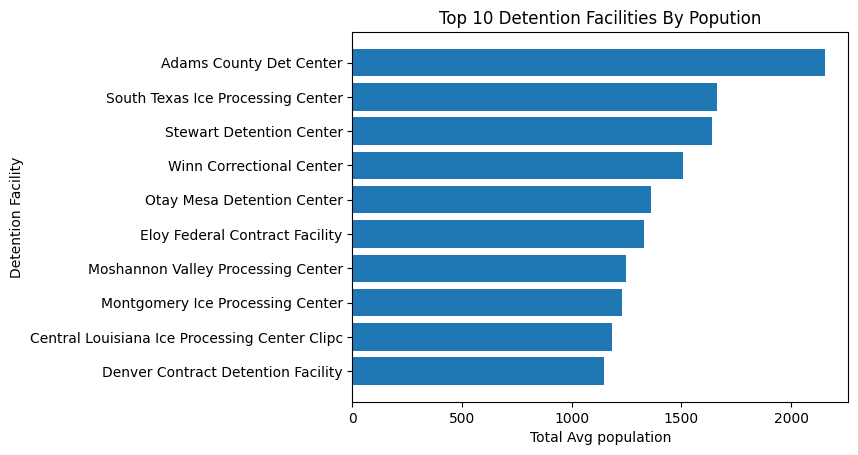

In [28]:
plt.barh(Top_10_Facilities["Name"], Top_10_Facilities["Total Avg Population"])
plt.gca().invert_yaxis()  # applied to make the highest bar appears at the top for easy visualization
plt.title("Top 10 Detention Facilities By Popution")
plt.ylabel("Detention Facility")
plt.xlabel("Total Avg population")

plt.savefig("line_chart.png")

plt.show()

### Summary:

Adams County Det Center in Mississippi, Natchez has the highest average total population to detenies according to the lastest inspected date on 2025-01-16